In [130]:
import sqlite3
import pandas as pd

db_name = 'db.sqlite3'
con = sqlite3.connect(db_name)

In [131]:
pd.read_sql('select count(*) from history', con)

,count(*)
0,10061260


In [195]:
df = pd.read_sql_query('select * from history limit 6000000 offset 4000000', con)
df

,id,side,price,size,exec_date,buy_child_order_acceptance_id,sell_child_order_acceptance_id
0,68298101,BUY,766243,0.032000,2017-11-11 01:05:23.190000,JRF20171111-100515-652085,JRF20171111-010510-253548
1,68298102,BUY,766300,0.010000,2017-11-11 01:05:23.190000,JRF20171111-100515-652085,JRF20171111-010310-005323
2,68298103,BUY,766784,2.000000,2017-11-11 01:05:23.190000,JRF20171111-100515-652085,JRF20171111-010520-521846
3,68298104,BUY,767000,0.500000,2017-11-11 01:05:23.190000,JRF20171111-100515-652085,JRF20171111-065409-688888
4,68298105,BUY,767149,1.000000,2017-11-11 01:05:23.190000,JRF20171111-100515-652085,JRF20171111-010437-862517
5,68298106,BUY,767150,0.425531,2017-11-11 01:05:23.190000,JRF20171111-100515-652085,JRF20171111-010046-276908
6,68298109,SELL,763864,0.080000,2017-11-11 01:05:24.237000,JRF20171111-010523-005423,JRF20171111-010522-521849
7,68298111,SELL,763864,0.145176,2017-11-11 01:05:25.160000,JRF20171111-010523-005423,JRF20171111-010522-862588
8,68298117,BUY,763932,0.600001,2017-11-11 01:05:26.563000,JRF20171111-100527-099673,JRF20171111-010523-078096
9,68298119,BUY,764897,0.450000,2017-11-11 01:05:26.923000,JRF20171111-010525-666622,JRF20171111-100526-875419


In [196]:
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')

In [197]:
df = df['2000':]
bench_price = df.price.resample('1Min').mean().fillna(method='ffill')
bench_price

exec_date
2017-11-11 01:05:00    7.649042e+05
2017-11-11 01:06:00    7.646171e+05
2017-11-11 01:07:00    7.639661e+05
2017-11-11 01:08:00    7.648829e+05
2017-11-11 01:09:00    7.660118e+05
2017-11-11 01:10:00    7.682979e+05
2017-11-11 01:11:00    7.689250e+05
2017-11-11 01:12:00    7.685205e+05
2017-11-11 01:13:00    7.680150e+05
2017-11-11 01:14:00    7.671440e+05
2017-11-11 01:15:00    7.659466e+05
2017-11-11 01:16:00    7.650225e+05
2017-11-11 01:17:00    7.630180e+05
2017-11-11 01:18:00    7.648773e+05
2017-11-11 01:19:00    7.647096e+05
2017-11-11 01:20:00    7.633206e+05
2017-11-11 01:21:00    7.642341e+05
2017-11-11 01:22:00    7.641099e+05
2017-11-11 01:23:00    7.636541e+05
2017-11-11 01:24:00    7.630919e+05
2017-11-11 01:25:00    7.638465e+05
2017-11-11 01:26:00    7.646092e+05
2017-11-11 01:27:00    7.643381e+05
2017-11-11 01:28:00    7.641623e+05
2017-11-11 01:29:00    7.647636e+05
2017-11-11 01:30:00    7.665891e+05
2017-11-11 01:31:00    7.671926e+05
2017-11-11 01:32:0

In [87]:
df.loc[200000]

id                                                  43803874
side                                                    SELL
price                                                 500010
size                                                   0.336
exec_date                         2017-08-30 11:29:10.080000
buy_child_order_acceptance_id      JRF20170830-202840-647160
sell_child_order_acceptance_id     JRF20170830-112841-996411
Name: 200000, dtype: object

In [89]:
day5 = 200000
day1 = day5 // 5
df = df[['id', 'side', 'price', 'size']]
df['mean5d'] = df.price.rolling(day5).mean()
df['mean_dist_per'] = 1 - df.mean5d / df.price.rolling(day1).mean()
df['mean_diff'] = df.mean_dist_per - df.mean_dist_per.shift(day1)
df

,id,side,price,size,mean5d,mean_dist_per,mean_diff
0,42164424,SELL,455100,0.009999,NaN,NaN,NaN
1,42164427,SELL,455100,0.000001,NaN,NaN,NaN
2,42164428,SELL,455003,0.005390,NaN,NaN,NaN
3,42164429,SELL,455001,0.029526,NaN,NaN,NaN
4,42164436,SELL,454881,0.104443,NaN,NaN,NaN
5,42164437,SELL,454880,0.810000,NaN,NaN,NaN
6,42164438,SELL,454797,1.085557,NaN,NaN,NaN
7,42164439,SELL,454797,1.844443,NaN,NaN,NaN
8,42164440,SELL,454730,0.155557,NaN,NaN,NaN
9,42164447,SELL,454731,0.020893,NaN,NaN,NaN


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

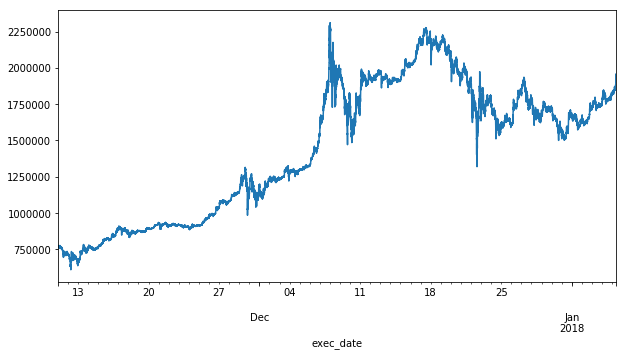

In [198]:
bench_price.plot(figsize=(10, 5))

In [182]:
def sign(a, b, base):
    return (a - base) * (b - base)

class SavePoint:
    SAVE_WID = 0.02
    WID_COEF = 0.5
    def __init__(self, p, sgn):
        self.pre_price = p
        self.sign = sgn
        self._set_save(p)

    def _set_save(self, p):
        self.base = p
        self.next_save = p * (1.0 + self.SAVE_WID * self.sign)
        self.trade_point = p * (1.0 - self.SAVE_WID * self.WID_COEF * self.sign)

    def update(self, p):
        if sign(p, self.base, self.next_save) < 0:
            self._set_save(p)
#             print('update save point: %d' % p)
        elif sign(p, self.base, self.trade_point) < 0:
#             print('exceed line: base=%d, p=%d, tp=%f, ns=%f' % (self.base, p, self.trade_point, self.next_save))
            return True
        self.pre_price = p
        return False

In [211]:
com = 0.15 / 100

trade_wait_limit = 60 * 24 * 5

x = []
yb = []
ys = []
y = []

def weight_mean(line, mean, alpha):
    return (line * (trade_wait_limit - alpha) + m * alpha) / trade_wait_limit

# df_bench_range = df.loc[:4000000]
bench = bench_price['2017-10-01':]
mean100 = bench.rolling(trade_wait_limit // 2).mean()
rollmin = bench.rolling(trade_wait_limit // 4).min()
for w in range(5, 121, 5):
    wid10 = w
    SavePoint.SAVE_WID = w / 1000
    SavePoint.WID_COEF = 40 / 100

    jpy = 40000
    btc = 0
    pre_trade_id = 0
    pre_buy = 0
    pre_sell = 99999999
    before = 0
    after = 0
    pre_trade_side = 'buy'

    save_point = None

    wid = wid10 / 1000
    x.append(w)
    for i, (v, m, mn) in enumerate(zip(bench, mean100, rollmin)):
        if not m:
            m = v + 1
        before = jpy + btc * v
        trade = False
    #     x.append(i)
    #     y.append(v)

        if pre_trade_id + trade_wait_limit < i:
        #         print('over limit: v=%d i=%d pre=%d' % (v, i, pre_trade_id))
            pre_buy = 0
            pre_sell = 99999999
        elif save_point and not save_point.update(v):
            continue
        buy_line = pre_sell * (1 - wid)
        sell_line = pre_buy * (1 + wid)

        diff = 1 - m / v
        if not save_point:
            if jpy > 0 and v < buy_line and diff < 0:
                save_point = SavePoint(v, -1)
            elif btc > 0 and v > sell_line:
                save_point = SavePoint(v, 1)
        else:
            if jpy > 0:
#                 print('buy : ', v, i)
                btc += jpy / (v * (1 + com))
                jpy = 0
                pre_buy = v
                pre_trade_side = 'buy'
            else:
#                 print('sell: ', v, i)
                jpy += btc * (v * (1 - com))
                btc = 0
                pre_sell = v
                pre_trade_side = 'sell'
            pre_trade_id = i
            after = jpy + btc * v
            save_point = None
#             x.append(i)
    y.append(after)
# print(w, after)
after

44031.511094245703

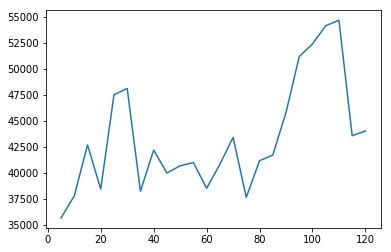

In [212]:
# 0-4000000 WID:0.06 wid:0.06 wid_coef:0.90
plt.plot(x, y)

In [133]:
len(x)

13

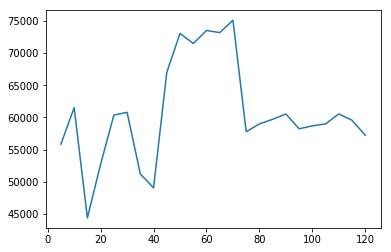

In [127]:
# 0-4000000 WID:0.06 wid:0.005-0.12 wid_coef:0.90
plt.plot(x, y)

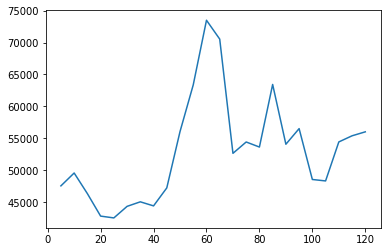

In [125]:
# 0-4000000 WID:0.005-0.12 wid:0.06 wid_coef:0.90
plt.plot(x, y)

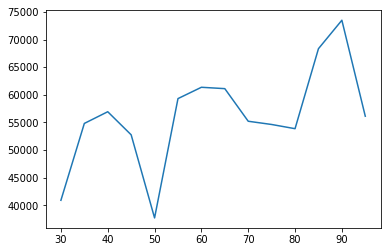

In [123]:
# 0-4000000 WID:0.06 wid:0.06 wid_coef:0.3-0.95
plt.plot(x, y)

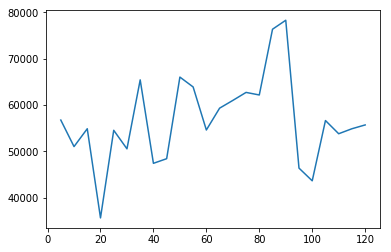

In [120]:
# 0-4000000 WID:0.06 wid:0.005-0.1
plt.plot(x, y)

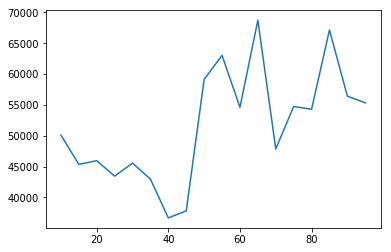

In [118]:
# 0-4000000 WID:0.01-0.10 wid:0.06
plt.plot(x, y)

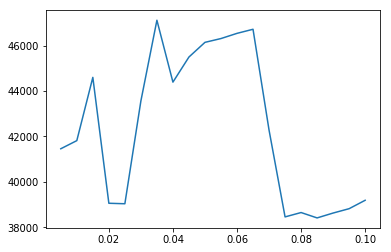

In [115]:
# 3000000-4000000 WID:0.01
plt.plot(x, y)

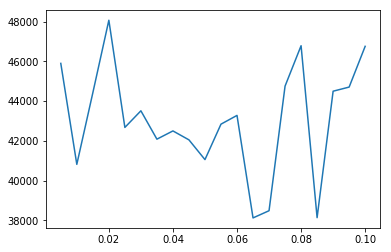

In [113]:
# 3000000-4000000 WID:0.02
plt.plot(x, y)

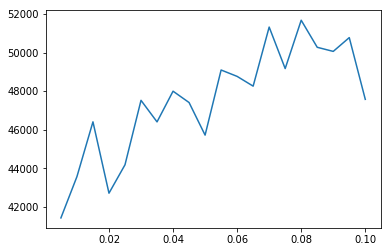

In [111]:
# 2000000-3000000 WID:0.02
plt.plot(x, y)

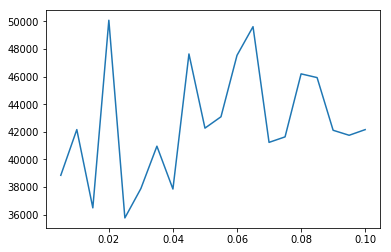

In [109]:
# 0-1500000 WID:0.02
plt.plot(x, y)

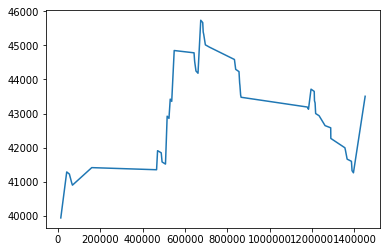

In [96]:
# 0-1500000 WID:0.02
plt.plot(x, y)

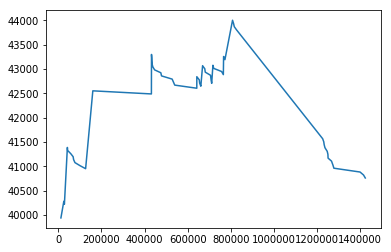

In [93]:
# 0-1500000 WID:0.01
plt.plot(x, y)

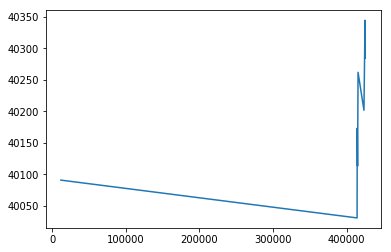

In [70]:
plt.plot(x[1:9], y[1:9])

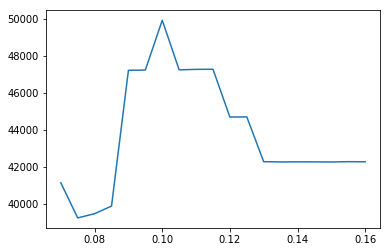

In [27]:
# 0-2000000 mean_border:buy
plt.plot(x, y)

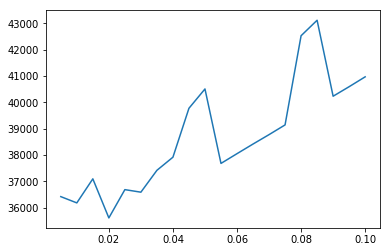

In [15]:
# 0-2000000 mean_border:buy
plt.plot(x, y)

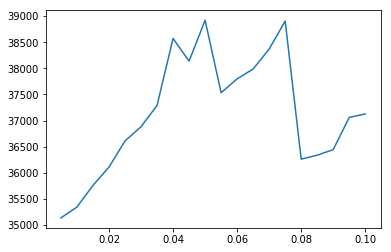

In [13]:
# 0-1500000 mean_border:buy-sell
plt.plot(x, y)

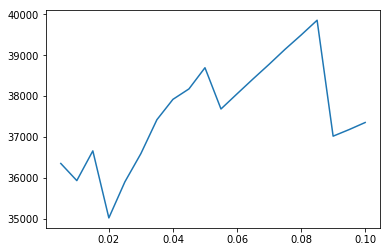

In [11]:
# 0-1500000 mean_border:buy
plt.plot(x, y)

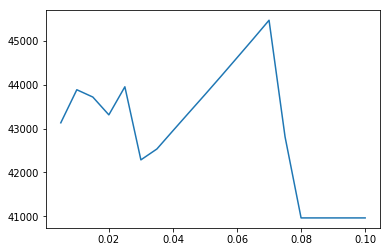

In [9]:
# 3000000-4000000 mean_border:buy-sell
plt.plot(x, y)

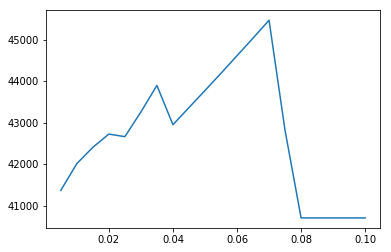

In [7]:
# 3000000-4000000 mean_border:buy
plt.plot(x, y)

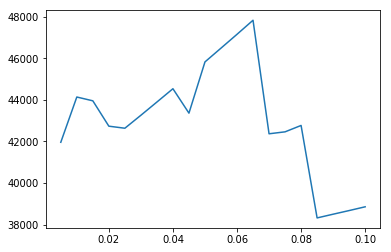

In [121]:
# 3000000-4000000 m:buy
plt.plot(x, y)

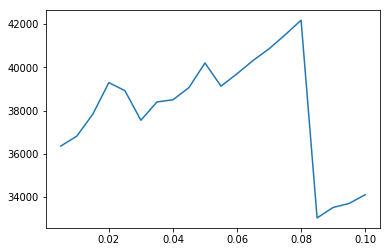

In [117]:
# 0-1500000 m:buy
plt.plot(x, y)

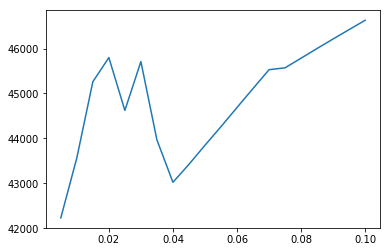

In [115]:
# 2000000-3000000 m:buy
plt.plot(x, y)

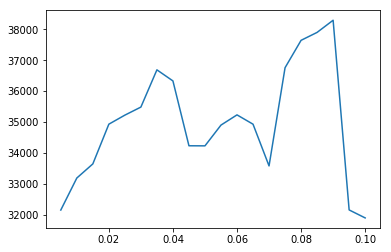

In [84]:
# 11/11まで逆順2000000取引
plt.plot(x, y)

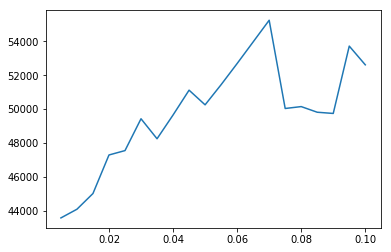

In [82]:
# 11/11まで正順2000000取引
plt.plot(x, y)

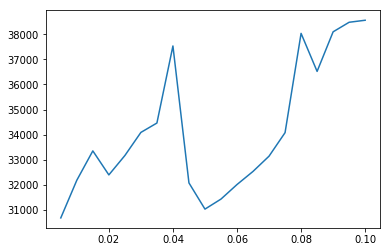

In [80]:
# 8/24から逆順2500000取引
plt.plot(x, y)

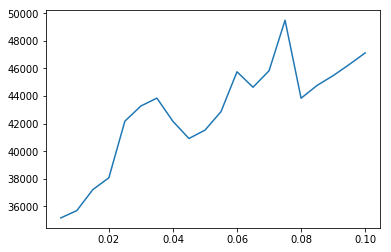

In [76]:
# 8/24から正順2000000取引
plt.plot(x, y)

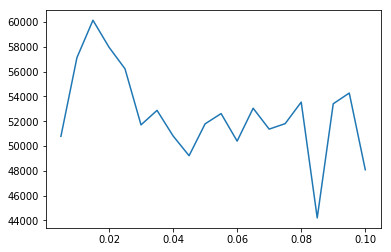

In [69]:
# 12/26から逆順2500000取引
plt.plot(x, y)
# plt.plot(x, yb)
# plt.plot(x, ys)

In [10]:
df.loc[1500000]

id                                                  85270657
side                                                    SELL
price                                                1854040
size                                                    0.01
exec_date                         2017-12-08 05:53:24.417000
buy_child_order_acceptance_id      JRF20171208-055317-025282
sell_child_order_acceptance_id     JRF20171208-054518-773740
Name: 1500000, dtype: object

In [219]:
test = pd.DataFrame([[1, 2], [3, None]])
test

,0,1
0,1,2.0
1,3,NaN


In [220]:
test[1].isnull()

0    False
1     True
Name: 1, dtype: bool

In [218]:
test[2][0] = 1
test

,0,1,2
0,1,2,1
1,3,4,0
